In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:\Python Project\House Production\housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [9]:
train_data = x_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13786,-117.04,34.04,30.0,3474.0,735.0,1674.0,691.0,2.5863,INLAND,98300.0
16124,-122.47,37.78,52.0,2635.0,587.0,1302.0,577.0,3.7292,NEAR BAY,416700.0
19296,-122.82,38.40,40.0,2406.0,423.0,1054.0,426.0,3.8846,<1H OCEAN,215900.0
5942,-117.88,34.14,23.0,2308.0,322.0,1001.0,317.0,7.5112,INLAND,355500.0
3104,-117.67,35.63,32.0,3661.0,787.0,1613.0,706.0,3.0687,INLAND,63500.0
...,...,...,...,...,...,...,...,...,...,...
10901,-117.83,33.74,23.0,1818.0,522.0,958.0,485.0,2.6771,<1H OCEAN,131500.0
9422,-122.66,37.93,42.0,1505.0,324.0,553.0,277.0,4.1792,NEAR OCEAN,350000.0
14710,-117.07,32.78,26.0,3725.0,623.0,1516.0,627.0,4.7143,NEAR OCEAN,268300.0
19952,-119.34,36.22,38.0,2708.0,460.0,1260.0,455.0,3.0905,INLAND,78200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

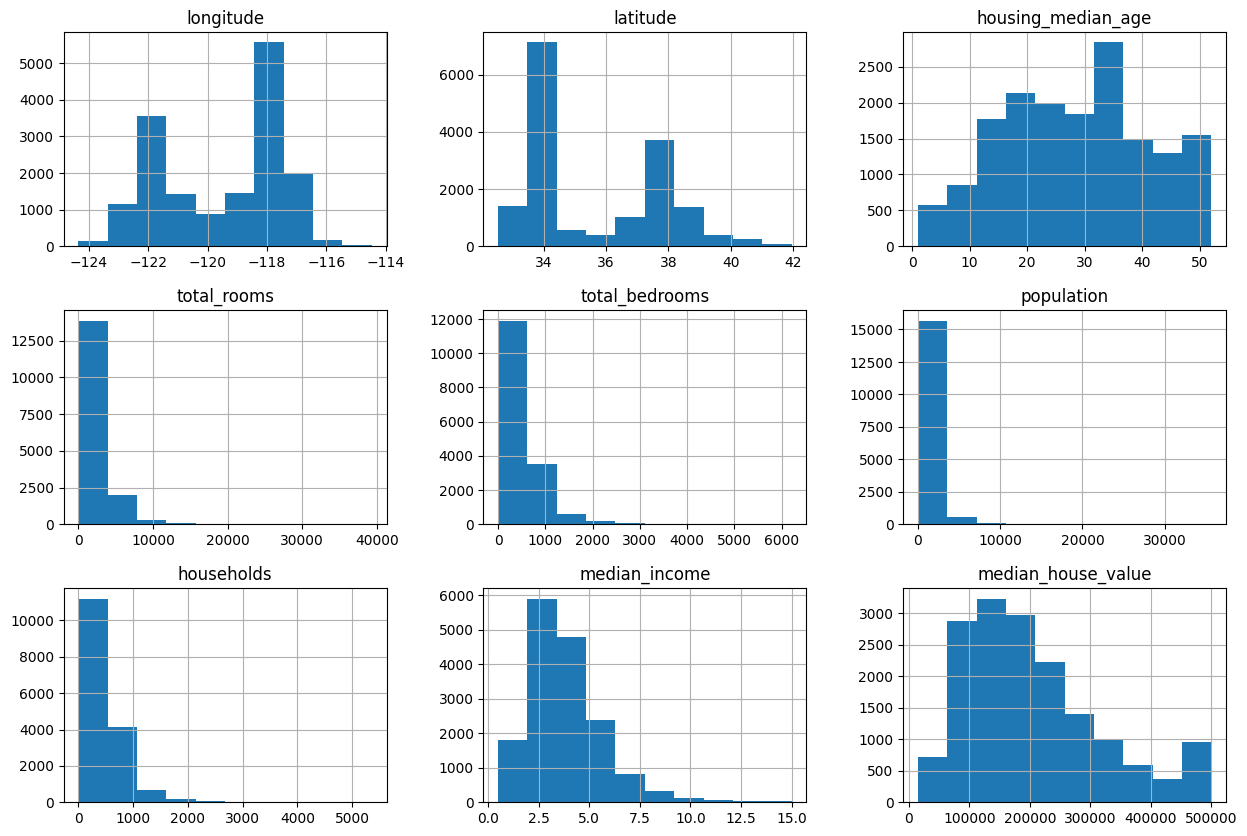

In [11]:
train_data.hist(figsize = (15, 10))

<Axes: >

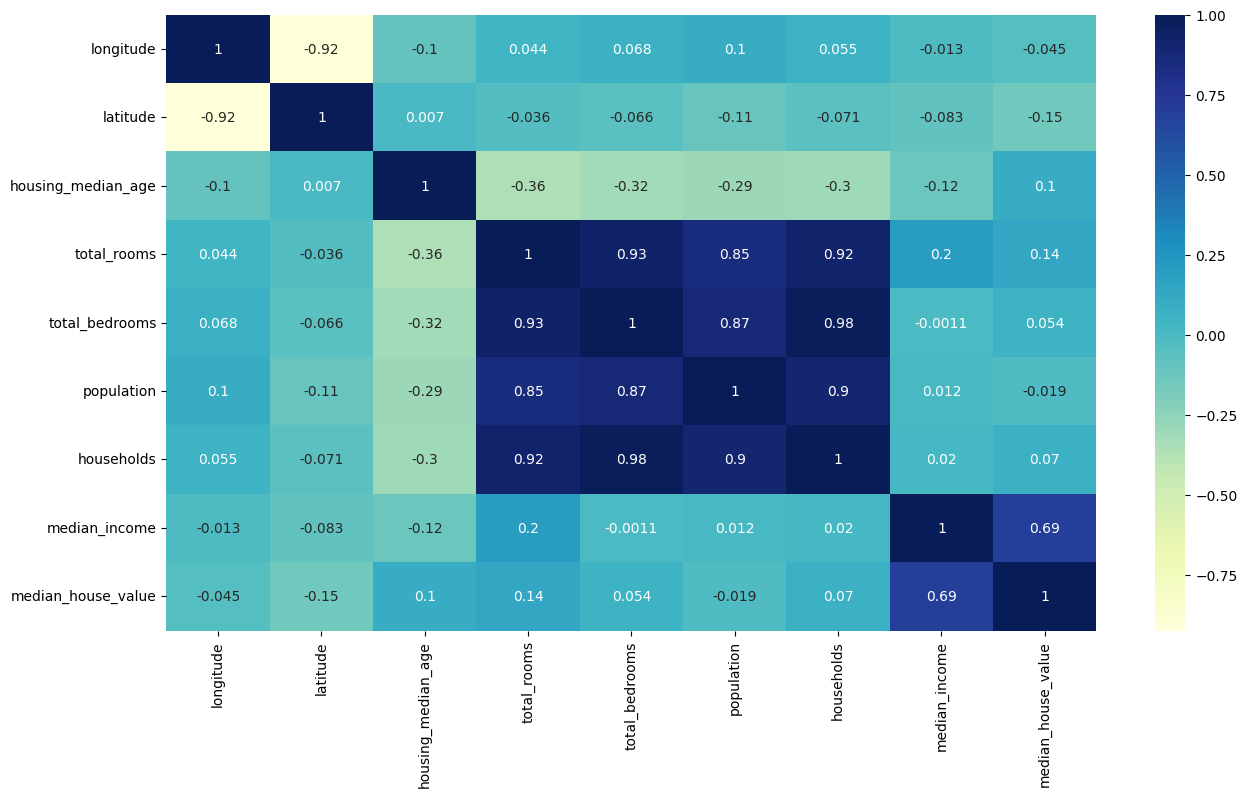

In [12]:
train_data1 = train_data.select_dtypes(include=[int, float])
plt.figure(figsize = (15,8))
sns.heatmap(train_data1.corr(), annot = True, cmap = 'YlGnBu')

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13786,-117.04,34.04,30.0,8.153350,6.601230,7.423568,2.020167,2.5863,INLAND,98300.0
16124,-122.47,37.78,52.0,7.877018,6.376727,7.172425,1.996002,3.7292,NEAR BAY,416700.0
19296,-122.82,38.40,40.0,7.786136,6.049733,6.961296,1.953989,3.8846,<1H OCEAN,215900.0
5942,-117.88,34.14,23.0,7.744570,5.777652,6.909753,1.911326,7.5112,INLAND,355500.0
3104,-117.67,35.63,32.0,8.205765,6.669498,7.386471,2.023008,3.0687,INLAND,63500.0
...,...,...,...,...,...,...,...,...,...,...
10901,-117.83,33.74,23.0,7.506042,6.259581,6.865891,1.972164,2.6771,<1H OCEAN,131500.0
9422,-122.66,37.93,42.0,7.317212,5.783825,6.317165,1.891246,4.1792,NEAR OCEAN,350000.0
14710,-117.07,32.78,26.0,8.223091,6.436150,7.324490,2.007212,4.7143,NEAR OCEAN,268300.0
19952,-119.34,36.22,38.0,7.904335,6.133398,7.139660,1.963258,3.0905,INLAND,78200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

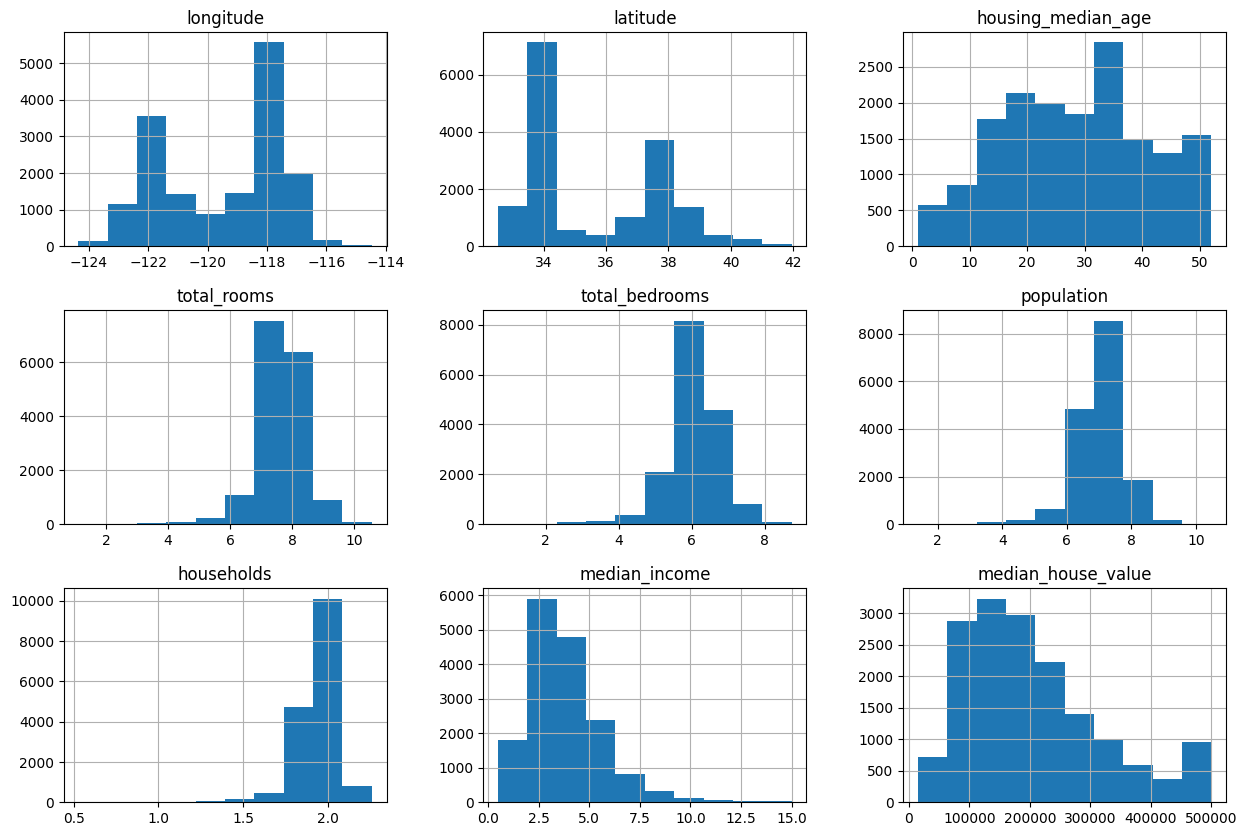

In [15]:
train_data.hist(figsize = (15,10))

In [16]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)   

<Axes: >

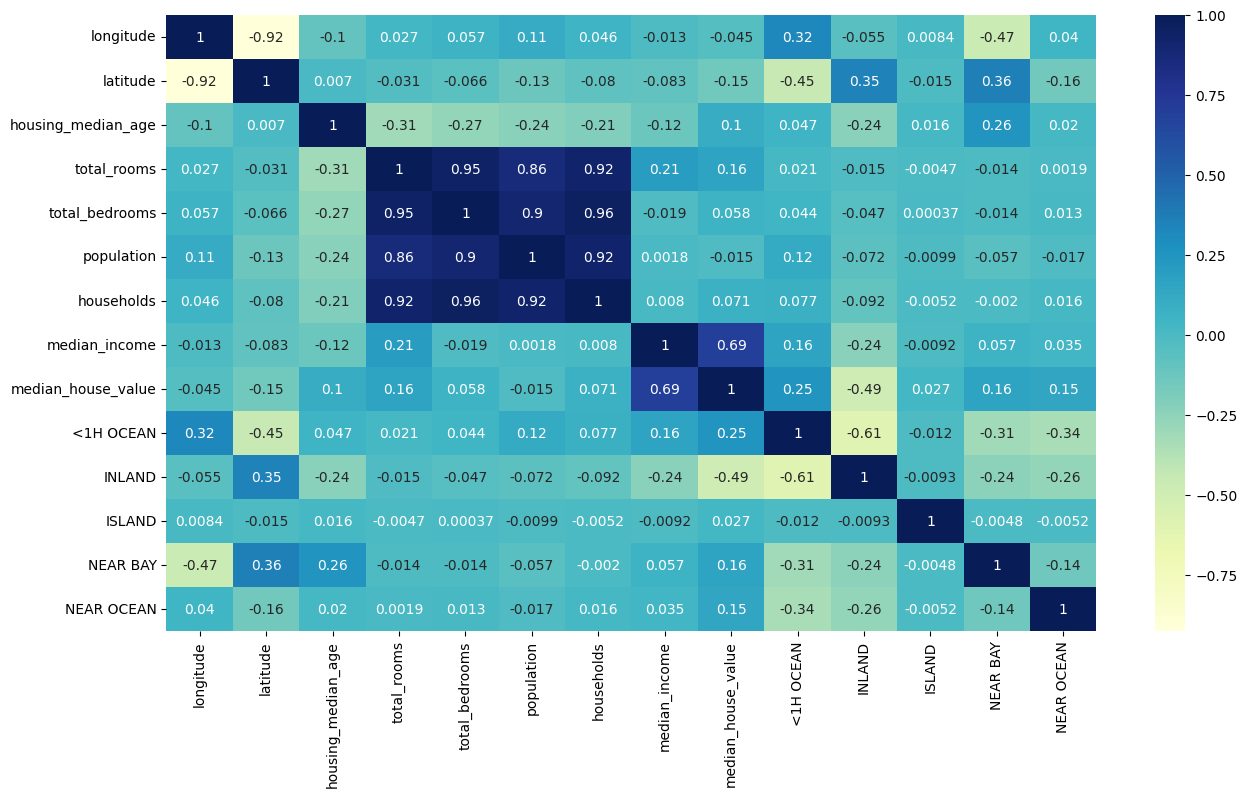

In [17]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

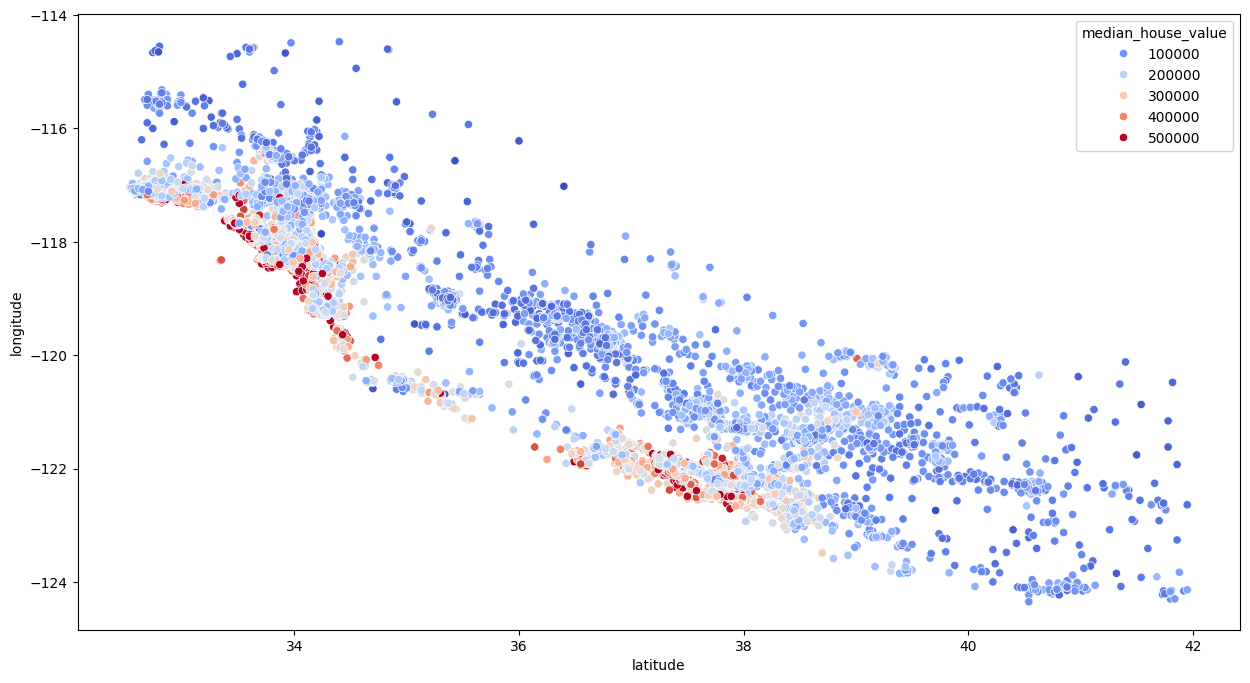

In [18]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'latitude', y= 'longitude', data= train_data, hue = 'median_house_value', palette = 'coolwarm')
                

In [19]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/ train_data['households']

<Axes: >

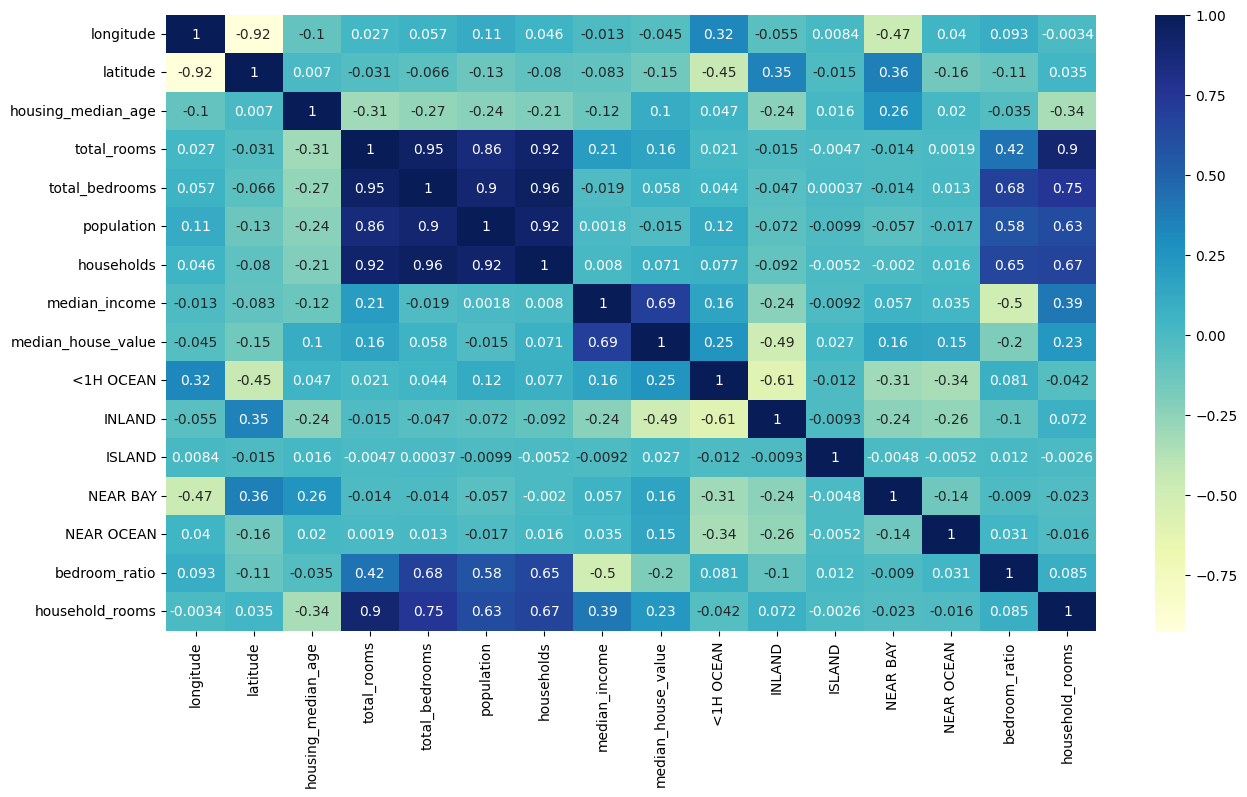

In [20]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)
 
reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [22]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis =1)   
    
test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/ test_data['households']


In [27]:
x_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [28]:
x_test_s = scaler.transform(x_test)

In [29]:
reg.score(x_test_s, y_test)

0.5661693474826235

In [30]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [31]:
forest.score(x_test_s, y_test)

0.7621386285695045

In [38]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators" : [100, 200, 300],
    "min_samples_split":[2, 4],
    "max_depth" : [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                             scoring = "neg_mean_squared_error",
                             return_train_score = True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
best_forest = grid_search.best_estimator_

In [40]:
best_forest.score(x_test_s, y_test)

0.7626698856203089